## Heart Failure

Dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Features: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Artigo: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


### Features:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean) - **{0: False, 1: True}**
- high blood pressure: if the patient has hypertension (boolean) - **{0: False, 1: True}**
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) - **entre 6000 - 13000**
- diabetes: if the patient has diabetes (boolean) - **{0: False, 1: True}**
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary) - **{0: "Woman", 1: "Man"}**
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean) - **{0: False, 1: True}**
- time: follow-up period (days) - **Período de acompanhamento**
- [target] death event: if the patient deceased during the follow-up period (boolean) - **{0: False, 1: True}**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv("heart_failure_dataset.csv")

In [3]:
# Raw data
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Descrever os dados
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- Sem missing values

# Pré análise de correlação de features com o target

In [5]:
# Ver correlação
heart.corr()["DEATH_EVENT"].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

Por correlação: as features **(i) time**, **(ii) serum_creatinine**,  **(iii) ejection_fraction**, **(iv) age**, **(v) serum_sodium** tem uma baixa correlação com **DEATH_EVENT** para prever uma falha no coração.

----

## Renomear features categóricas

In [6]:
heart["anaemia"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["diabetes"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["high_blood_pressure"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["smoking"].replace({0: "No", 1: "Yes"}, inplace = True)

heart["sex"].replace({0: "Woman", 1: "Man"}, inplace = True)

heart["DEATH_EVENT"].replace({0: "Survived", 1: "Dead"}, inplace = True)

In [7]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Man,No,4,Dead
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Man,No,6,Dead
2,65.0,No,146,No,20,No,162000.00,1.3,129,Man,Yes,7,Dead
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Man,No,7,Dead
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Woman,No,8,Dead


---

## Análise da coluna target (DEATH_EVENT)

In [8]:
# Survived or Dead
heart['DEATH_EVENT'].value_counts()

Survived    203
Dead         96
Name: DEATH_EVENT, dtype: int64

In [9]:
# Proportion
heart['DEATH_EVENT'].value_counts(normalize = True)

Survived    0.67893
Dead        0.32107
Name: DEATH_EVENT, dtype: float64

Proporção de sobreviventes e falecidos de 2:1

---

# Variáveis categóricas

## sex

In [19]:
sex = heart.groupby(["sex", "DEATH_EVENT"])[["sex"]].count()
sex['proporcao'] = heart.groupby(["sex", "DEATH_EVENT"])[["sex"]].count()/heart.groupby(["sex"])[["sex"]].count()
sex.rename({'sex':'total'}, axis=1, inplace=True)
sex

total  proporcao
sex   DEATH_EVENT                  
Man   Dead            62   0.319588
      Survived       132   0.680412
Woman Dead            34   0.323810
      Survived        71   0.676190

Proporção de falecidos e sobreviventes para ambos os sexos são iguais à proporção geral. Portanto, **sex** não é um fator determinante para prever uma ocorrência de morte.

---

## smoking

In [22]:
smoking = heart.groupby(["smoking", "DEATH_EVENT"])[["smoking"]].count()
smoking['proporcao'] = heart.groupby(["smoking", "DEATH_EVENT"])[["smoking"]].count()/heart.groupby(["smoking"])[["smoking"]].count()
smoking.rename({'smoking':'total'}, axis=1, inplace=True)
smoking

total  proporcao
smoking DEATH_EVENT                  
No      Dead            66   0.325123
        Survived       137   0.674877
Yes     Dead            30   0.312500
        Survived        66   0.687500

Proporção de falecidos e sobreviventes para quem fuma é igual à proporção geral. Portanto, **smoking** não é um fator determinante para prever uma ocorrência de morte.

---

## diabetes

In [23]:
diabetes = heart.groupby(["diabetes", "DEATH_EVENT"])[["diabetes"]].count()
diabetes['proporcao'] = heart.groupby(["diabetes", "DEATH_EVENT"])[["diabetes"]].count()/heart.groupby(["diabetes"])[["diabetes"]].count()
diabetes.rename({'diabetes':'total'}, axis=1, inplace=True)
diabetes

total  proporcao
diabetes DEATH_EVENT                  
No       Dead            56   0.321839
         Survived       118   0.678161
Yes      Dead            40   0.320000
         Survived        85   0.680000

Proporção de falecidos e sobreviventes para quem tem **diabetes** é igual à proporção geral. Portanto, **diabetes** não é um fator determinante para prever uma ocorrência de morte.

---

## anaemia

In [24]:
anaemia = heart.groupby(["anaemia", "DEATH_EVENT"])[["anaemia"]].count()
anaemia['proporcao'] = heart.groupby(["anaemia", "DEATH_EVENT"])[["anaemia"]].count()/heart.groupby(["anaemia"])[["anaemia"]].count()
anaemia.rename({'anaemia':'total'}, axis=1, inplace=True)
anaemia

total  proporcao
anaemia DEATH_EVENT                  
No      Dead            50   0.294118
        Survived       120   0.705882
Yes     Dead            46   0.356589
        Survived        83   0.643411

Proporção de sobreviventes e falecidos para quem tem **anaemia** é similar à proporção geral. Portanto, **anaemia** não é um fator determinante para prever uma ocorrência de morte.

---

## high_blood_pressure

In [25]:
high_pressure = heart.groupby(["high_blood_pressure", "DEATH_EVENT"])[["high_blood_pressure"]].count()
high_pressure['proporcao'] = heart.groupby(["high_blood_pressure", "DEATH_EVENT"])[["high_blood_pressure"]].count()/heart.groupby(["high_blood_pressure"])[["high_blood_pressure"]].count()
high_pressure.rename({'high_blood_pressure':'total'}, axis=1, inplace=True)
high_pressure

total  proporcao
high_blood_pressure DEATH_EVENT                  
No                  Dead            57   0.293814
                    Survived       137   0.706186
Yes                 Dead            39   0.371429
                    Survived        66   0.628571

Proporção de sobreviventes e falecidos para quem tem pressão alta é similar à proporção geral. Portanto, **high_blood_pressure** não é um fator determinante para prever uma ocorrência de morte.

---

# Variáveis numéricas

---

### Teste de hipótese

- $H_{0}$ : A média de **-feature-** para falecidos é igual a média para sobreviventes
- $H_{1}$ : A média de **-feature-** para falecidos é diferente da média para sobreviventes

**Paired Sample Z-Test**

$$z = \frac{x_{0,mean} - x_{1,mean}}{\sqrt{\frac{\sigma^2_{0}}{n_{0}}+\frac{\sigma^2_{1}}{n_{1}}}}$$

Sobreviventes
- $x_{0,mean}$
- $\sigma^2_{0}$
- $n_{0}$

Falecidos
- $x_{1,mean}$
- $\sigma^2_{1}$
- $n_{1}$
-------
- $\alpha$ = 0.05
- gl = $n_{0}$ + $n_{1}$ - 2 = 203 + 96 - 2 = 297
- two-tailed
- $Z_{c}$ = 1.96
---
Se z > $Z_{c}$, então rejeita a hipótese nula

---

## age

In [84]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['age'].median())
print(heart[heart["DEATH_EVENT"] == 'Dead']['age'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['age'].median())
print(heart[heart["DEATH_EVENT"] == 'Survived']['age'].std())

Pessoas falecidas
65.0
13.214555639583372

Pessoas vivas
60.0
10.637890226515534


In [85]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['age'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['age'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['age'].median())

0.08333333333333333

**Uma diferença relativa baixa**

# Teste-Z

In [86]:
# Sobreviventes
x0 = 60
s2_0 = 10.64**2
n0 = 203

# Falecidas
x1 = 65
s2_1 = 13.21**2
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 3.244132161308385
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


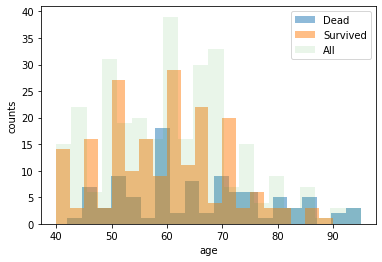

In [87]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["age"],  alpha = 0.5, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["age"], alpha = 0.5, bins = 20, label = 'Survived')
plt.hist(heart["age"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("age")
plt.ylabel("counts")
plt.legend()
plt.show()

As médias e desvio padrão apresentam uma pequena diferença nos extremos a qual pode afetar o teste de hipóteses. A proporção de morte para cada faixa etária varia, sendo as mais velhas com maior probabilidade de morrer, não necessariamente por falha no coração. Portanto, analisar uma faixa etária menor pode ser mais confiável para checar se a idade é um fator determinante para prever a morte de uma pessoa por falha no coração.
Nesse caso, foi escolhido uma amostra do dataset, da média até um desvio padrão de distância.

In [88]:
age_dead = heart[(heart["age"] > 52) & (heart["age"] < 78) & (heart["DEATH_EVENT"] == 'Dead')].shape[0]
age_survived = heart[(heart["age"] > 50) & (heart["age"] < 70) & (heart["DEATH_EVENT"] == 'Survived')].shape[0]

print(f"Proporção de falecidos em 68.2% (1 desvio padrão de distância): {100 * (age_dead / (age_dead+age_survived)):.2f}%")
print(f"Proporção de sobreviventes em 68.2% (1 desvio padrão de distância): {100 * (age_survived / (age_dead+age_survived)):.2f}%")

Proporção de falecidos em 68.2% (1 desvio padrão de distância): 34.73%
Proporção de sobreviventes em 68.2% (1 desvio padrão de distância): 65.27%


Nesse caso, podemos considerar que **age** não é um fator determinante para prever uma morte.

----

## creatinine_phosphokinase

In [89]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['creatinine_phosphokinase'].median())
print(heart[heart["DEATH_EVENT"] == 'Dead']['creatinine_phosphokinase'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['creatinine_phosphokinase'].median())
print(heart[heart["DEATH_EVENT"] == 'Survived']['creatinine_phosphokinase'].std())

Pessoas falecidas
259.0
1316.5806399417013

Pessoas vivas
245.0
753.7995715566005


In [90]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['creatinine_phosphokinase'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['creatinine_phosphokinase'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['creatinine_phosphokinase'].median())

0.05714285714285714

**Uma diferença relativa baixa**

### Teste Z

In [91]:
# Sobreviventes
x0 = 245
s2_0 = 568212.9
n0 = 203

# Falecidas
x1 = 259
s2_1 = 1733435.6
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 0.09694282223354052
Falhou-se em rejeitar a hipótese nula


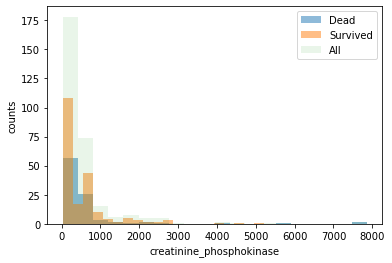

In [92]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["creatinine_phosphokinase"],  alpha = 0.5, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["creatinine_phosphokinase"], alpha = 0.5, bins = 20, label = 'Survived')
plt.hist(heart["creatinine_phosphokinase"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("creatinine_phosphokinase")
plt.ylabel("counts")
plt.legend()
plt.show()

In [93]:

heart[(heart["creatinine_phosphokinase"]) & (heart["DEATH_EVENT"] == 'Survived')].shape[0]

79

**creatinine_phosphokinase** não é fator determinante para prever uma morte

---

## ejection_fraction

In [94]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['ejection_fraction'].median())
print(heart[heart["DEATH_EVENT"] == 'Dead']['ejection_fraction'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['ejection_fraction'].median())
print(heart[heart["DEATH_EVENT"] == 'Survived']['ejection_fraction'].std())

Pessoas falecidas
30.0
12.52530333701386

Pessoas vivas
38.0
10.859962681586294


In [95]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['ejection_fraction'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['ejection_fraction'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['ejection_fraction'].median())

0.21052631578947367

**Uma diferença relativa alta**

## Teste Z

In [96]:
# Sobreviventes
x0 = 38
s2_0 = 117.94
n0 = 203

# Falecidas
x1 = 30
s2_1 = 156.75
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 5.376764548697805
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


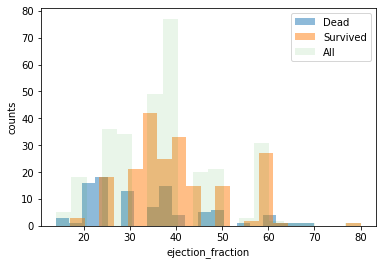

In [97]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["ejection_fraction"],  alpha = 0.5, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["ejection_fraction"], alpha = 0.5, bins = 20, label = 'Survived')
plt.hist(heart["ejection_fraction"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("ejection_fraction")
plt.ylabel("counts")
plt.legend()
plt.show()

**ejection_fraction** é um fator determinante para prever uma morte por falha no coração

---

## serum_creatinine

In [98]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_creatinine'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_creatinine'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_creatinine'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_creatinine'].std())

Pessoas falecidas
1.8358333333333332
1.4685615351275343

Pessoas vivas
1.184876847290641
0.6540826541207885


In [99]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['serum_creatinine'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['serum_creatinine'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['serum_creatinine'].median())

0.30000000000000004

**Uma diferença relativa alta**

## Teste Z

In [100]:
# Sobreviventes
x0 = 1.185
s2_0 = 0.428
n0 = 203

# Falecidas
x1 = 1.836
s2_1 = 2.16
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 4.1499181001815435
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


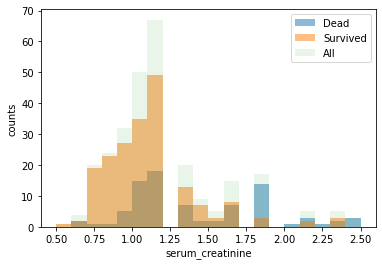

In [101]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["serum_creatinine"],  alpha = 0.5, bins = 20, label = 'Dead', range = (0.5, 2.5))
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["serum_creatinine"], alpha = 0.5, bins = 20, label = 'Survived', range = (0.5, 2.5))
plt.hist(heart["serum_creatinine"], alpha = 0.1, bins = 20, label = 'All', range = (0.5, 2.5))
plt.xlabel("serum_creatinine")
plt.ylabel("counts")
plt.legend()
plt.show()

**serum_creatinine** é um fator determinante para prever uma morte por falha no coração

----

## platelets

In [102]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['platelets'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['platelets'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['platelets'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['platelets'].std())

Pessoas falecidas
256381.0447916667
98525.68285648678

Pessoas vivas
266657.4899014779
97531.20228346101


In [103]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['platelets'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['platelets'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['platelets'].median())

0.017110266159695818

**Uma diferença relativa baixa**

In [104]:
# Sobreviventes
x0 = 266657.49
s2_0 = 97531.20**2
n0 = 203

# Falecidas
x1 = 256381.04
s2_1 = 98525.68**2
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 0.8447857686207411
Falhou-se em rejeitar a hipótese nula


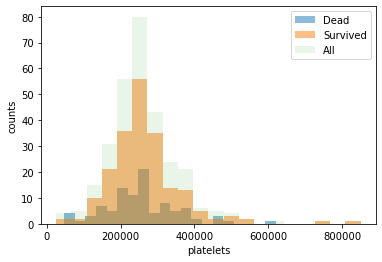

In [105]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["platelets"],  alpha = 0.5, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["platelets"], alpha = 0.5, bins = 20, label = 'Survived')
plt.hist(heart["platelets"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("platelets")
plt.ylabel("counts")
plt.legend()
plt.show()

**platelets** não é fator determinante para prever uma morte

---

## serum_sodium

In [106]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_sodium'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_sodium'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_sodium'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_sodium'].std())

Pessoas falecidas
135.375
5.00157869813964

Pessoas vivas
137.2167487684729
3.9829233593022115


In [107]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['serum_sodium'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['serum_sodium'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['serum_sodium'].median())

0.010948905109489052

**Uma diferença relativa baixa**

## Teste Z

In [108]:
# Sobreviventes
x0 = 137.22
s2_0 = 15.86
n0 = 203

# Falecidas
x1 = 135.375
s2_1 = 25
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 3.170942243443875
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


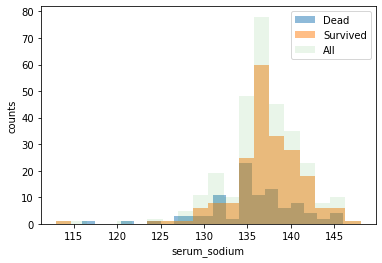

In [109]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["serum_sodium"],  alpha = 0.5, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["serum_sodium"], alpha = 0.5, bins = 20, label = 'Survived')
plt.hist(heart["serum_sodium"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("serum_sodium")
plt.ylabel("counts")
plt.legend()
plt.show()

**serum_sodium** é um fator determinante para prever uma morte por falha no coração de acordo com o teste de hipóteses.
Mas a diferença relativa entre as médias é relativamente baixa. O que pode deixar em dúvida se esta feature é realmente determinante.

---

## time

In [110]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['time'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['time'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['time'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['time'].std())

Pessoas falecidas
70.88541666666667
62.378280597904244

Pessoas vivas
158.3399014778325
67.7428724392971


In [111]:
# Diferença relativa entre as médias
abs((heart[heart["DEATH_EVENT"] == 'Dead']['time'].median() - heart[heart["DEATH_EVENT"] == 'Survived']['time'].median())/heart[heart["DEATH_EVENT"] == 'Survived']['time'].median())

0.7412790697674418

**Uma diferença relativa alta**. No entanto, essa feature não faz muito sentido

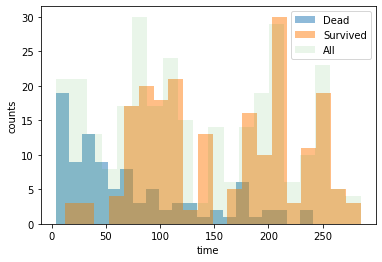

In [112]:
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["time"],  alpha = 0.5, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["time"], alpha = 0.5, bins = 20, label = 'Survived')
plt.hist(heart["time"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("time")
plt.ylabel("counts")
plt.legend()
plt.show()

----

---

# Conclusão

- Da pré-análise de correlação, podemos mostrar que **(i) time**, **(ii) serum_creatinine**, **(iii) ejection_fraction**, **(iv) age**, **(v) serum_sodium** tem baixa correlação com **DEATH_EVENT**.
- Fazendo uma EDA e um teste de hipóteses, **(ii) serum_creatinine**, **(iii) ejection_fraction** e **(v) serum_sodium** apresentaram a possibilidade de poderem prever uma possível falha no coração.
- De acordo com o artigo [1], **serum_creatinine** e **ejection_fraction** são os dois parâmetros utilizados para identificar uma possível falha no coração. Nesse caso, foi utilizado Machine Learning para identificar com maior precisão estes dois parâmetros.

# Referência
[1] Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5